In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import kruskal

import numpy as np
import random
#np.random.seed(42)
#random.seed(42)

In [51]:
df = pd.read_csv("Data/final_data.csv")
df["date"] = pd.to_datetime(df["date"])

In [52]:
# Kruskal-Wallis
daily_season = (
    df.groupby(["date", "season"], as_index=False).agg(
        daily_total=("pocet_total", "sum")
    )
)
groups = [
    daily_season[daily_season["season"] == s]["daily_total"]
    for s in daily_season["season"].unique()
]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p:.6f}")

Kruskal-Wallis p-value: 0.000000


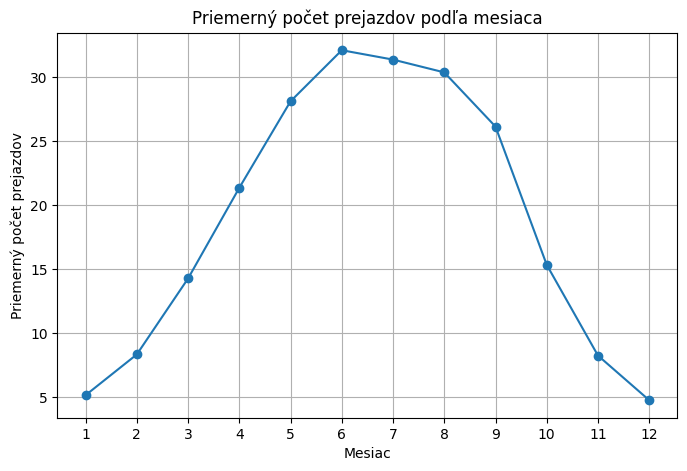

In [53]:
# Mesačný sezónny vzor
monthly_city = (
    df.groupby("month", as_index=False).agg(
        monthly_avg=("pocet_total", "mean")
    )
)

plt.figure(figsize=(8,5))
plt.plot(monthly_city["month"], monthly_city["monthly_avg"], marker="o")
plt.xlabel("Mesiac")
plt.ylabel("Priemerný počet prejazdov")
plt.title("Priemerný počet prejazdov podľa mesiaca")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

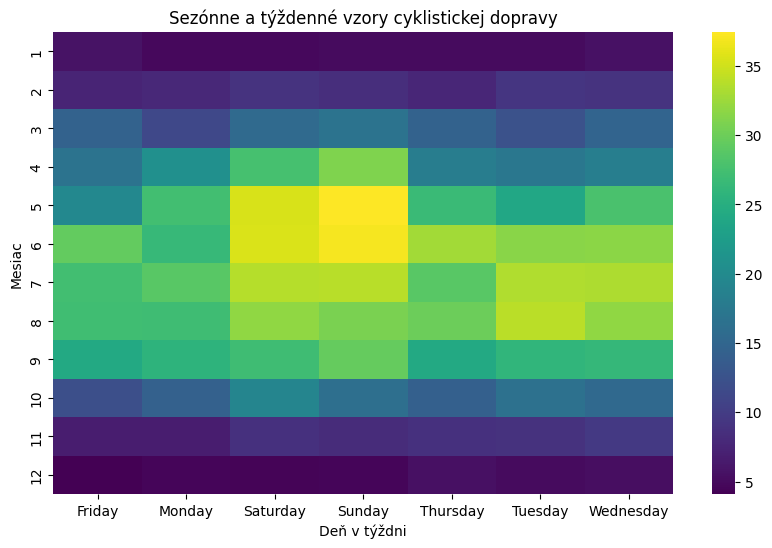

In [54]:
# Kombinácia sezónnych a týždenných vzorov (heatmapa)
df["weekday"] = df["date"].dt.day_name()

heatmap_data = (
    df.groupby(["month", "weekday"], as_index=False)
      .agg(mean_daily=("pocet_total", "mean"))
)

pivot = heatmap_data.pivot(
    index="month",
    columns="weekday",
    values="mean_daily"
)


plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="viridis")
plt.title("Sezónne a týždenné vzory cyklistickej dopravy")
plt.xlabel("Deň v týždni")
plt.ylabel("Mesiac")
plt.show()

In [55]:
# Sezónne indexy
season_means = (
    df.groupby("season", as_index=False)
      .agg(mean_daily=("pocet_total", "mean"))
)

season_means["seasonal_index"] = (
    season_means["mean_daily"] / season_means["mean_daily"].mean()
)

print(season_means)

   season  mean_daily  seasonal_index
0  autumn   16.620820        0.882602
1  spring   21.340627        1.133234
2  summer   31.274747        1.660757
3  winter    6.090278        0.323407
